<a href="https://colab.research.google.com/github/pardeshiaarti/Computer-Fundamentals/blob/main/LDADemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


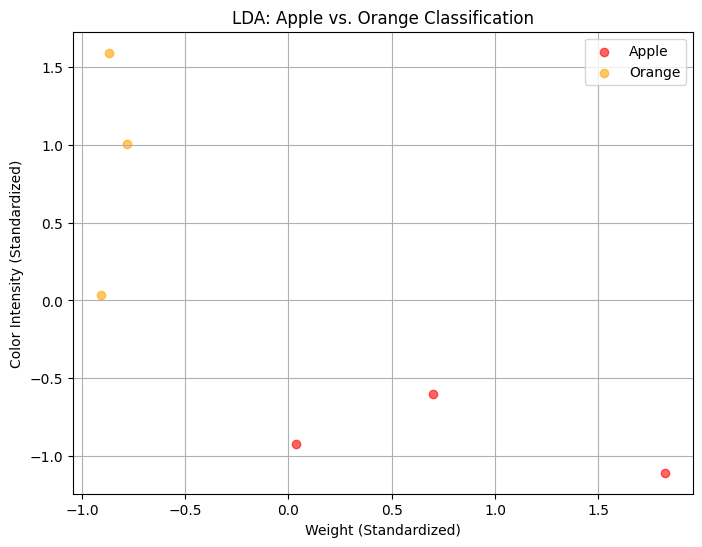

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create directory for storing results
results_dir = '/content/drive/MyDrive/LDA/'
os.makedirs(results_dir, exist_ok=True)

# Step 1: Load images and extract features
def load_images(folder, label):
    images = []
    features = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50, 50))  # Resize for consistency
            avg_color = img.mean(axis=(0, 1))  # Extract average color
            weight = os.stat(img_path).st_size  # Use file size as weight proxy
            features.append([weight, avg_color[2] / 255])  # Normalize color intensity
            images.append(img)
    return np.array(features), [label] * len(features)

# Define paths for images (adjust these paths in Google Drive)
apple_folder = '/content/drive/MyDrive/LDA/Apples/'
orange_folder = '/content/drive/MyDrive/LDA/Oranges/'

apple_features, apple_labels = load_images(apple_folder, 0)
orange_features, orange_labels = load_images(orange_folder, 1)

# Combine data
X = np.vstack((apple_features, orange_features))
y = np.array(apple_labels + orange_labels)

# Step 2: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_test_scaled)

# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Save results to a text file
results_path = os.path.join(results_dir, "LDA_results.txt")
with open(results_path, "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Confusion Matrix:\n{conf_matrix}\n")
    f.write(f"Classification Report:\n{class_report}\n")

# Step 6: Visualize decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], label='Apple', color='red', alpha=0.6)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], label='Orange', color='orange', alpha=0.6)
plt.legend()
plt.xlabel("Weight (Standardized)")
plt.ylabel("Color Intensity (Standardized)")
plt.title("LDA: Apple vs. Orange Classification")
plt.grid()

# Save the plot
plot_path = os.path.join(results_dir, "LDA_plot.png")
plt.savefig(plot_path)
plt.show()
